Missing values after manual injection:
Home               0
Price              0
SqFt               0
Bedrooms           0
Bathrooms          0
Offers             0
Brick              0
Neighborhood       0
Age              128
Neighbourhood    128
dtype: int64
Missing values per column:
 Age              128
Neighbourhood    128
dtype: int64


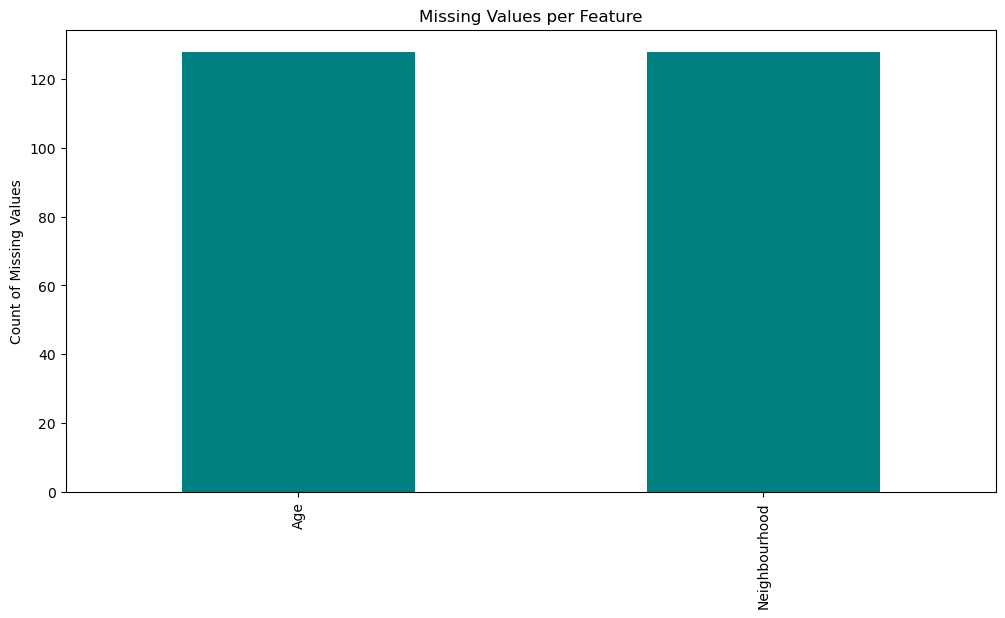

Dropped columns: ['Age', 'Neighbourhood']

Missing values after cleaning: 0

Original Dataset Size: (128, 8)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset and identify missing values
df = pd.read_csv('house-prices.csv') # Replace with your filename
# Manually injecting missing values to demonstrate cleaning skills
# We will hide 10% of the values in two columns
df.loc[df.sample(frac=0.1).index, 'Age'] = np.nan
df.loc[df.sample(frac=0.1).index, 'Neighbourhood'] = np.nan

print("Missing values after manual injection:")
print(df.isnull().sum())
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])

# 2. Visualize missing data patterns
plt.figure(figsize=(12, 6))
missing_counts[missing_counts > 0].plot(kind='bar', color='teal')
plt.title('Missing Values per Feature')
plt.ylabel('Count of Missing Values')
plt.show()

# 3 & 4. Imputation Strategy
# Numerical: Use Median (more robust to outliers like expensive houses)
# Categorical: Use Mode (most frequent category)
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply Mean/Median Imputation for numerical
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Apply Mode Imputation for categorical
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 5. Remove columns with extremely high missing values (Threshold: e.g., 40%)
# Re-load or check original missing data before imputation for this step
threshold = 0.4 * len(df)
cols_to_drop = [col for col in df.columns if df[col].isnull().sum() > threshold]
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

# 6. Validate dataset after cleaning
print("\nMissing values after cleaning:", df.isnull().sum().sum())

# 7. Compare Quality (Brief Report)
print(f"\nOriginal Dataset Size: {df.shape}")